# Analyzing Bay Wheels trip data - April 2020
### by Gabriel Medeiros das Neves

## Introduction

This project was developed in order to explore Bay Wheels trip data in April 2020, identifying correlations and patterns, as well as generating reliable and useful insights for the organization.  
The entire study was perfomed solely through Python 3 for Udacity Data Analyst Nanodegree and focused on understanding more deeply the relationship between the number of rentals in the different features and which of them can help to predict trip time.  
That being said, I'll be importing the necessary libraries and begin to wrangle and explore the data.

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Wrangling
In this section of the report I will gather the necessary data, understand its general properties, identify and clean possible issues, such as missing or incorrect values, for example.

### Gather
Here I'll be converting the provided `.csv` file in a Pandas DataFrame.

In [2]:
# Defining trip_data pandas DataFrame
trip_data = pd.read_csv('baywheels_tripdata.csv')
trip_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5A1FF31692371859,electric_bike,2020-04-04 08:28:20,2020-04-04 08:33:34,NaN,NaN,NaN,NaN,37.7692,-122.4209,37.7703,-122.4069,casual
1,D8D5BA2D4F051133,electric_bike,2020-04-03 18:55:43,2020-04-03 19:21:05,NaN,NaN,NaN,NaN,37.8023,-122.4244,37.8023,-122.4244,casual
2,A3633A9140CA4FF8,electric_bike,2020-04-04 15:11:04,2020-04-04 15:12:21,NaN,NaN,NaN,NaN,37.7667,-122.3961,37.7667,-122.3962,casual
3,301F57EB0197A5E0,electric_bike,2020-04-03 20:21:03,2020-04-03 22:08:06,8th St at Ringold St,60.0,NaN,NaN,37.7744,-122.4095,37.7805,-122.4033,casual
4,9429C701AF5744B3,electric_bike,2020-04-03 18:39:39,2020-04-03 18:47:19,NaN,NaN,NaN,NaN,37.8027,-122.4433,37.8009,-122.4269,casual


### Assess
The main objective of the Assess section is to better understand each piece of data and identify possible issues that must be cleaned.

In [3]:
# Selecting a 5 row sample
trip_data.sample(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
18021,C55F9C95AFC57B71,electric_bike,2020-04-26 15:33:47,2020-04-26 15:45:38,NaN,NaN,NaN,NaN,37.7982,-122.4473,37.7964,-122.4169,casual
45057,C000F2FB6CA27619,electric_bike,2020-04-09 19:05:10,2020-04-09 19:19:14,NaN,NaN,NaN,NaN,37.7623,-122.4386,37.7469,-122.4440,member
71717,8334C88F395E390A,electric_bike,2020-04-22 07:46:58,2020-04-22 08:07:29,NaN,NaN,NaN,NaN,37.7672,-122.4502,37.7553,-122.4050,member
72779,E1CF6D63203BC5D8,electric_bike,2020-04-12 16:03:53,2020-04-12 16:42:16,Central Ave at Fell St,70.0,Central Ave at Fell St,70.0,37.7735,-122.4444,37.7733,-122.4445,member
40393,2B15965DFAB3D86B,docked_bike,2020-04-09 16:51:16,2020-04-09 17:28:18,Terry Francois Blvd at Mission Bay Blvd N,461.0,Heron's Head Park,463.0,37.7713,-122.3866,37.7403,-122.3768,member


In [4]:
# Checking df shape
trip_data.shape

(84259, 13)

In [5]:
# Checking df datatypes
trip_data.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id      float64
end_station_name       object
end_station_id        float64
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [6]:
# Checking df null values
trip_data.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    30825
start_station_id      30825
end_station_name      32401
end_station_id        32401
start_lat                 0
start_lng                 0
end_lat                 142
end_lng                 142
member_casual             0
dtype: int64

In [7]:
# Understanding rideable_type values
trip_data.rideable_type.unique()

array(['electric_bike', 'docked_bike'], dtype=object)

In [8]:
# Understanding member_casual values
trip_data.member_casual.unique()

array(['casual', 'member'], dtype=object)

In [9]:
# Checking unique start stations
trip_data.start_station_name.unique()

array([nan, '8th St at Ringold St', 'Chestnut St at Van Ness Ave',
       'Buchanan St at North Point St',
       'Montgomery St BART Station (Market St at 2nd St)',
       'Post St at Webster St', '4th St at 16th St',
       'McKinnon Ave at 3rd St', 'Precita Park', 'Central Ave at Fell St',
       'Funston Ave at Fulton St', 'Steiner St at California St',
       'The Embarcadero at Bryant St', 'Market St at Steuart St',
       'Leavenworth St at Broadway',
       'Union Square (Powell St at Post St)', '10th St at Empire St',
       'Market St at Dolores St', 'Davis St at Jackson St',
       'Salesforce Transit Center (Natoma St at 2nd St)',
       '4th St at Mission Bay Blvd S', '23rd St at Taylor St',
       'Folsom St at 19th St', '15th St at Potrero Ave',
       'Market St at 10th St', 'Jones St at Post St',
       'Fell St at Stanyan St', 'Octavia Blvd at Page St',
       'Eureka Valley Recreation Center', 'S Park St at 3rd St',
       'Golden Gate Ave at Hyde St', 'Sonora Ave at

In [10]:
# Checking unique end stations
trip_data.end_station_name.unique()

array([nan, '4th St at 16th St',
       'Montgomery St BART Station (Market St at 2nd St)', 'Precita Park',
       'Grove St at Divisadero',
       'Garfield Square (25th St at Harrison St)',
       'Post St at Webster St', 'Broderick St at Oak St',
       'Central Ave at Fell St', 'Greenwich St at Franklin St',
       '10th St at Empire St', 'Leavenworth St at Broadway',
       'Davis St at Jackson St', '4th St at Mission Bay Blvd S',
       'San Francisco Public Library (Grove St at Hyde St)',
       '15th St at Potrero Ave', '23rd St at Tennessee St',
       'Mission Playground', 'Jones St at Post St',
       'Market St at Dolores St', 'Fell St at Stanyan St',
       'Golden Gate Ave at Polk St', 'S Park St at 3rd St',
       'Sonora Ave at 1st St', '20th St at Bryant St',
       'Market St at 10th St', 'Scott St at Golden Gate Ave',
       'Broadway at Kearny',
       'San Francisco Caltrain (Townsend St at 4th St)',
       '23rd St at Taylor St', 'Parker Ave at McAllister St',
   

In [11]:
# Checking a started_at value to understand its type and format
trip_data.started_at.iloc[0]

'2020-04-04 08:28:20'

#### Observed Issues

1. Missing data in **station columns** and **end coordinates**.
2. **Date columns** are strings instead of datetime.
3. The column name **"member_casual"** does not match the column values, since the column is representing the user account type.
4. There are some unhelpful columns for the scope of this analysis.

### Clean
Here I will be defining and executing programmatic solutions for each identified issue in the Assess section, as well as testing whether the proposed solution solved the problem or not.

#### Define
1. The missing stations will be filled with **"None"** values, while the coordinates columns will not be filled as they do not belong to the scope of this analysis.
2. Use the pandas [to_datetime()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) method to convert column values to datetime.
3. Rename column to **"account_type"**.
4. Drop `ride_id`, `start_station_id`, `end_station_id`, `start_lat`, `start_lng`, `end_lat` and `end_lng` columns.

#### Code and Test
Here I will be using code techniques to clean up the data as planned in the **Define** section.

In [12]:
# Creating a copy df that is going to be cleaned, in order to preserve the original df
clean_trip_data = trip_data.copy()

In [13]:
# Dropping unhelpful columns
clean_trip_data.drop(['ride_id', 'start_station_id', 
                      'end_station_id', 'start_lat', 
                      'start_lng', 'end_lat', 'end_lng'], axis=1, inplace=True)
# Checking if it worked
clean_trip_data.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual
0,electric_bike,2020-04-04 08:28:20,2020-04-04 08:33:34,NaN,NaN,casual
1,electric_bike,2020-04-03 18:55:43,2020-04-03 19:21:05,NaN,NaN,casual
2,electric_bike,2020-04-04 15:11:04,2020-04-04 15:12:21,NaN,NaN,casual
3,electric_bike,2020-04-03 20:21:03,2020-04-03 22:08:06,8th St at Ringold St,NaN,casual
4,electric_bike,2020-04-03 18:39:39,2020-04-03 18:47:19,NaN,NaN,casual


In [14]:
# Filling null values with "None"
clean_trip_data.fillna('None', inplace=True)
# Checking if it worked
clean_trip_data.isnull().sum()

rideable_type         0
started_at            0
ended_at              0
start_station_name    0
end_station_name      0
member_casual         0
dtype: int64

In [15]:
# Converting started_at and ended_at columns to datetime
clean_trip_data['started_at'] = pd.to_datetime(clean_trip_data.started_at)
clean_trip_data['ended_at'] = pd.to_datetime(clean_trip_data.ended_at)
# Checking a started_at value to check if it worked
clean_trip_data.started_at.iloc[0]

Timestamp('2020-04-04 08:28:20')

In [16]:
# Renaming member_casual column to "account_type"
clean_trip_data.rename(columns={'member_casual': 'account_type'}, inplace=True)
# Visualizing random sample to check if everything is as expected
clean_trip_data.sample(5)

,rideable_type,started_at,ended_at,start_station_name,end_station_name,account_type
32914,electric_bike,2020-04-15 09:38:43,2020-04-15 09:49:47,None,San Carlos St at 11th St,casual
39040,electric_bike,2020-04-18 12:27:48,2020-04-18 12:38:09,Arguello Blvd at Geary Blvd,None,member
47461,docked_bike,2020-04-20 14:26:46,2020-04-20 14:38:09,Powell St BART Station (Market St at 4th St),Market St at 10th St,member
5444,electric_bike,2020-04-24 17:44:22,2020-04-24 18:18:18,None,None,casual
15947,docked_bike,2020-04-25 13:22:33,2020-04-25 16:50:59,Greenwich St at Franklin St,7th Ave at Cabrillo St,casual


### Feature Engineering

In this section I'll be using the knowledge acquired by inspecting the dataframes to create new features, aiming to facilitate the exploration.

In [17]:
# Creating started_hour and ended_hour columns
clean_trip_data['started_hour'] = clean_trip_data.started_at.dt.hour
clean_trip_data['ended_hour'] = clean_trip_data.ended_at.dt.hour
# Visualizing random sample to check if it worked
clean_trip_data.sample(5)

,rideable_type,started_at,ended_at,start_station_name,end_station_name,account_type,started_hour,ended_hour
45690,electric_bike,2020-04-11 08:40:29,2020-04-11 08:56:43,None,None,member,8,8
23295,electric_bike,2020-04-19 13:24:04,2020-04-19 13:53:27,None,None,casual,13,13
468,electric_bike,2020-04-09 17:36:18,2020-04-09 17:46:23,22nd St at Potrero Ave,Rhode Island St at 17th St,casual,17,17
13131,electric_bike,2020-04-20 04:54:37,2020-04-20 04:58:12,None,None,casual,4,4
24506,electric_bike,2020-04-08 14:20:04,2020-04-08 15:28:38,None,Valencia St at 22nd St,casual,14,15


In [18]:
# Creating monthday column with the started day
clean_trip_data['monthday'] = clean_trip_data.started_at.dt.day
# Visualizing random sample to check if it worked
clean_trip_data.sample(5)

,rideable_type,started_at,ended_at,start_station_name,end_station_name,account_type,started_hour,ended_hour,monthday
73700,electric_bike,2020-04-05 21:47:51,2020-04-05 22:08:46,Valencia St at 16th St,Valencia St at Clinton Park,member,21,22,5
26594,electric_bike,2020-04-14 15:25:28,2020-04-14 16:37:08,Precita Park,None,casual,15,16,14
32101,electric_bike,2020-04-08 11:42:34,2020-04-08 11:54:34,None,Folsom St at 13th St,casual,11,11,8
41791,docked_bike,2020-04-02 14:16:30,2020-04-02 14:43:25,California St at University Ave,Horton St at 40th St,member,14,14,2
13879,electric_bike,2020-04-19 11:30:34,2020-04-19 11:40:34,Yerba Buena Center for the Arts (Howard St at ...,None,casual,11,11,19


In [19]:
# Creating weekday column with the day of the week when the ride was started
clean_trip_data['weekday'] = clean_trip_data.started_at.dt.weekday
clean_trip_data['weekday'] = clean_trip_data.weekday.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 
                                                          3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
# Visualizing random sample to check if it worked
clean_trip_data.sample(5)

,rideable_type,started_at,ended_at,start_station_name,end_station_name,account_type,started_hour,ended_hour,monthday,weekday
71754,electric_bike,2020-04-24 07:45:16,2020-04-24 08:09:06,None,None,member,7,8,24,Friday
77050,docked_bike,2020-04-28 21:26:54,2020-04-28 21:34:47,Telegraph Ave at 23rd St,Telegraph Ave at 23rd St,member,21,21,28,Tuesday
16469,electric_bike,2020-04-13 08:52:14,2020-04-13 08:57:26,24th St at Bartlett St,Utah St at 24th St,casual,8,8,13,Monday
72884,docked_bike,2020-04-21 18:19:59,2020-04-21 19:40:12,Paseo De San Antonio at 2nd St,Santa Clara St at 7th St,casual,18,19,21,Tuesday
79821,docked_bike,2020-04-01 18:59:30,2020-04-01 19:07:16,College Ave at Alcatraz Ave,Ashby BART Station,member,18,19,1,Wednesday


In [20]:
# Creating trip_time with the difference between ended_at and started_at (TimeDelta object)
clean_trip_data['trip_time'] = clean_trip_data.ended_at - clean_trip_data.started_at
# Converting TimeDelta object to float representing minutes
clean_trip_data['trip_time'] = ((clean_trip_data.trip_time.dt.days * 1440) + 
                                (clean_trip_data.trip_time.dt.seconds / 60))
# Checking if it worked
clean_trip_data.head(5)

,rideable_type,started_at,ended_at,start_station_name,end_station_name,account_type,started_hour,ended_hour,monthday,weekday,trip_time
0,electric_bike,2020-04-04 08:28:20,2020-04-04 08:33:34,None,None,casual,8,8,4,Saturday,5.233333
1,electric_bike,2020-04-03 18:55:43,2020-04-03 19:21:05,None,None,casual,18,19,3,Friday,25.366667
2,electric_bike,2020-04-04 15:11:04,2020-04-04 15:12:21,None,None,casual,15,15,4,Saturday,1.283333
3,electric_bike,2020-04-03 20:21:03,2020-04-03 22:08:06,8th St at Ringold St,None,casual,20,22,3,Friday,107.050000
4,electric_bike,2020-04-03 18:39:39,2020-04-03 18:47:19,None,None,casual,18,18,3,Friday,7.666667


In [21]:
# Dropping started_at and ended_at, since it is no longer necessary
clean_trip_data.drop(['started_at', 'ended_at'], axis=1, inplace=True)
# Checking 5 row random sample of the cleaned df
clean_trip_data.sample(5)

,rideable_type,start_station_name,end_station_name,account_type,started_hour,ended_hour,monthday,weekday,trip_time
5184,electric_bike,None,None,casual,14,15,11,Saturday,29.350000
30858,electric_bike,Laguna St at Hayes St,None,casual,17,18,24,Friday,10.216667
13011,electric_bike,None,None,casual,14,15,6,Monday,6.433333
6596,electric_bike,None,None,casual,22,22,7,Tuesday,3.183333
64669,electric_bike,23rd St at Tennessee St,Market St at Steuart St,member,15,15,12,Sunday,16.966667


#### Storing Cleaned Data

In [22]:
# Exporting cleaned df in a csv file
clean_trip_data.to_csv('clean_trip_data.csv', index=False)

## Exploratory Data Analysis
The Exploratory Data Analysis section is where I'll be focusing on computing statistics and creating visualizations to explore the dataset. 

#### What is the structure of the dataset?
There are 84,259 bike rents in the dataset with 9 features (rideable_type, start_station_name, end_station_name, account_type, started_hour, ended_hour, monthday, weekday, and trip_time). 

**Column data types:**
1. `rideable_type`: object (str)
2. `start_station_name`: object (str)
3. `end_station_name`: object (str)
4. `account_type`: object (str)
5. `started_hour`: integer
6. `ended_hour`: integer
7. `monthday`: integer
8. `weekday`: object (str)
9. `trip_time`: float (representing minutes)

#### What is/are the main feature(s) of interest in the dataset?
I'm most interested in understanding which features are correlated to the number of rents, I'll probably be researching at what time of the day most rentals occur, which type of bike is most popular, which days of the week have the most rentals, etc.  
I'm also interested in figuring out which features can help predict the trip time of a rent.

#### What features in the dataset  will probably help support the investigation into the feature(s) of interest?
I believe that the day of the week and the time of day will be determining factors when investigating my features of interest, although I assume that the remaining features will also have relevant information to the analysis.

### Univariate Exploration
Here I'll be investigating distributions of individual variables.

#### Descriptive statistics

In [23]:
# Checking descriptive statistics
clean_trip_data.describe()

,started_hour,ended_hour,monthday,trip_time
count,84259.000000,84259.000000,84259.000000,84259.000000
mean,14.354360,14.620290,17.064587,34.476465
std,4.358705,4.423126,8.424906,605.103733
min,0.000000,0.000000,1.000000,-1.533333
25%,12.000000,12.000000,10.000000,6.666667
50%,15.000000,15.000000,18.000000,12.516667
75%,17.000000,18.000000,25.000000,24.633333
max,23.000000,23.000000,30.000000,54728.866667


Observations:  
1. Most rentals occur between midday and 5pm.
2. There's at least one negative value in the trip time column.
3. Most trips take 6 to 25 minutes.
4. There are some trips that take more than a day (?)

#### Rideable type

In [24]:
# Checking rideable_type value counts
clean_trip_data.rideable_type.value_counts()

electric_bike    57710
docked_bike      26549
Name: rideable_type, dtype: int64

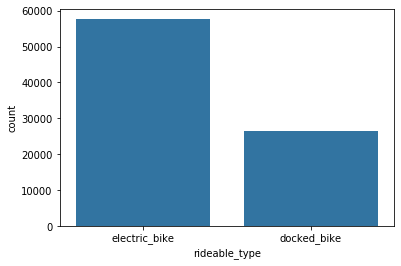

In [25]:
# Setting base color to use in the plots
base_color = sns.color_palette()[0]
# Creating countplot (using basecolor)
sns.countplot(data=clean_trip_data, x='rideable_type', color=base_color);

Observations:
1. Electric bikes were rented more than twice as often as docked bikes.

#### Start station

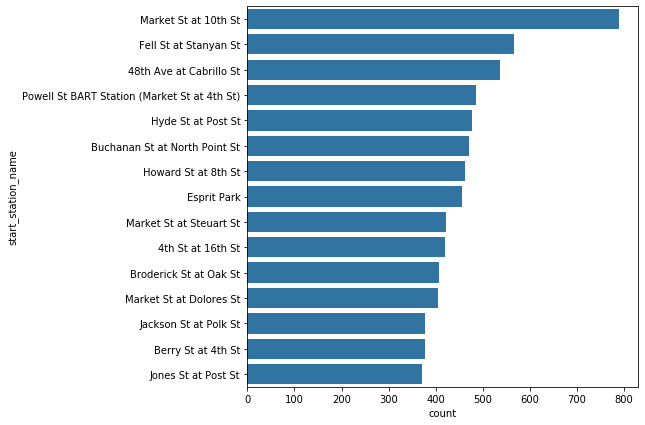

In [26]:
# Setting figure size
plt.figure(figsize=(7, 7))
# Selecting the 15 start stations with more rents
popular_start_stations = clean_trip_data['start_station_name'].value_counts().index[1:16]
# Creating countplot (using basecolor)
sns.countplot(data=clean_trip_data, y='start_station_name', color=base_color, order=popular_start_stations);

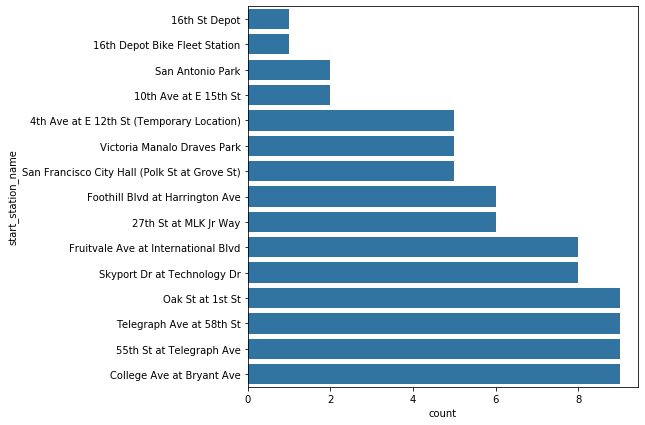

In [27]:
# Setting figure size
plt.figure(figsize=(7, 7))
# Selecting the 15 start stations with less rents
unpopular_start_stations = clean_trip_data['start_station_name'].value_counts().index[-16:-1][::-1]
# Creating countplot (using basecolor)
sns.countplot(data=clean_trip_data, y='start_station_name', color=base_color, order=unpopular_start_stations);

In [28]:
# Checking rides with no start station associated
clean_trip_data.start_station_name.value_counts()['None']

30825

Observations:  
1. Market St at 10th St was the most common start station with a significant difference from the second one.
2. It is important to inform which stations are more or less in demand to decide which of them should have more or less bicycles available.
3. There are 30825 rides with no start station associated.

#### End station

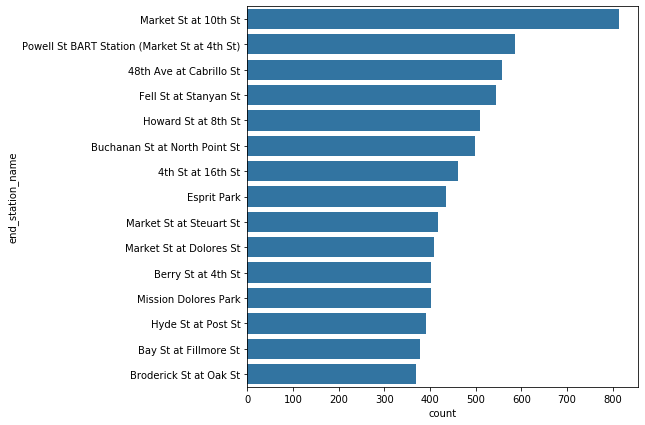

In [29]:
# Setting figure size
plt.figure(figsize=(7, 7))
# Selecting the 15 end stations with more returns
popular_end_stations = clean_trip_data['end_station_name'].value_counts().index[1:16]
# Creating countplot (using basecolor)
sns.countplot(data=clean_trip_data, y='end_station_name', color=base_color, order=popular_end_stations);

In [30]:
# Checking rides with no end station associated
clean_trip_data.end_station_name.value_counts()['None']

32401

Observations:  
1. Once again, the Market St at 10th St was the in the top of the list, being the most common end station with a significant difference from the second one.
2. There are 32401 rides with no end station associated, 1573 more than with start stations.

#### Account type

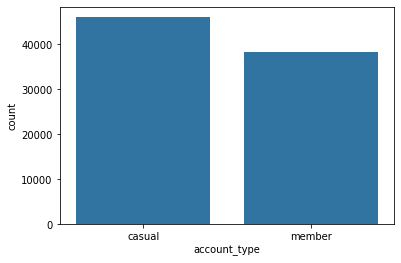

In [31]:
# Creating countplot (using basecolor)
sns.countplot(data=clean_trip_data, x='account_type', color=base_color);

Observations:  
1. There were more rides by casual users than members.

#### Started hour

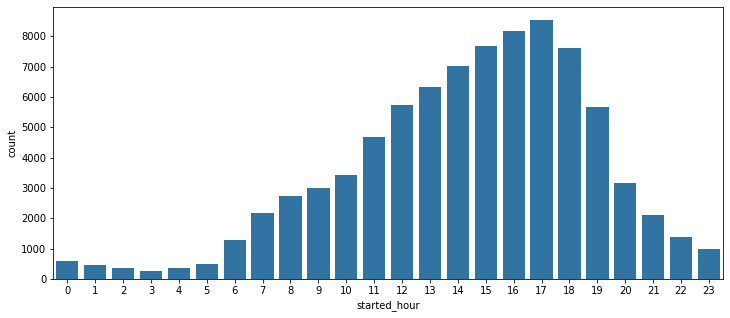

In [32]:
# Setting figure size
plt.figure(figsize=(12, 5))
# Creating countplot (using base_color)
sns.countplot(data=clean_trip_data, x='started_hour', color=base_color);

Observations:  
1. Left-skewed distribution.
2. Rental incidence decreases considerably between 8 pm and 10 am.

#### Ended hour

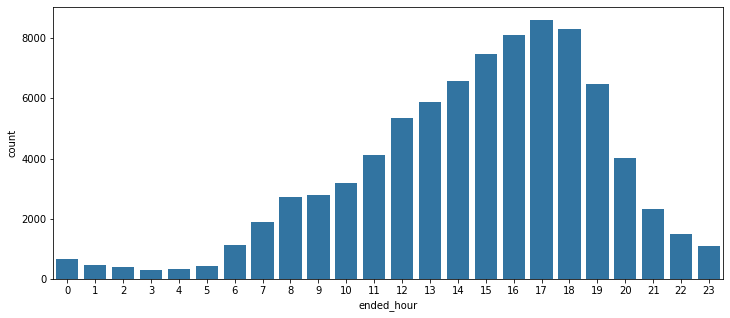

In [33]:
# Setting figure size
plt.figure(figsize=(12, 5))
# Creating countplot (using base color)
sns.countplot(data=clean_trip_data, x='ended_hour', color=base_color);

Observations:  
1. Left-skewed distribution.
2. Very similar to the started_hour distributions, which indicates that most of the trips take a short period of time (less than 2 hours).

#### Monthday

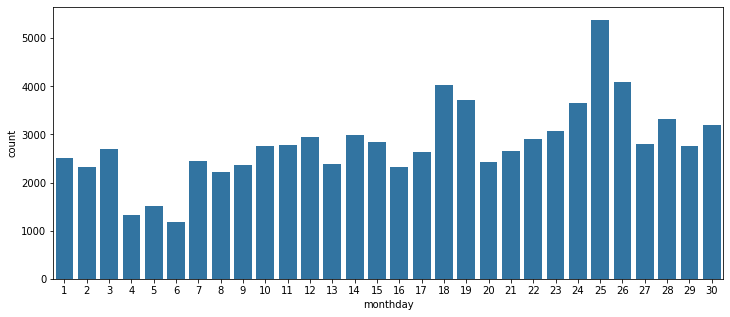

In [34]:
# Setting figure size
plt.figure(figsize=(12, 5))
# Creating countplot (using base color)
sns.countplot(data=clean_trip_data, x='monthday', color=base_color);

Observations:  
1. Rentals below the average in days 4, 5 and 6 (I'll possibly investigate what happened in those days, checking for news or something related to the COVID-19).
2. Low variations over the month.
3. More than 5000 rides on April 25.

#### Weekday

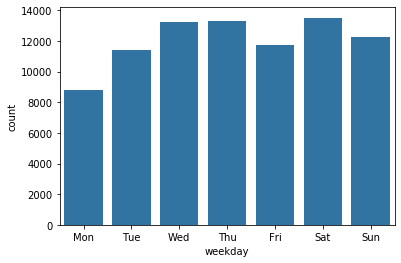

In [35]:
# Creating countplot (using base color) and defining axes variable to change the tick labels later
ax = sns.countplot(data=clean_trip_data, x='weekday', color=base_color, 
                   order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);
# Changing xticklabels to weekdays abbreviations
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);

Observations:  
1. Monday below the average.
2. It doesn't seems that there's much variation between the days of the week. 

#### Trip time

In [36]:
# Checking 99 percentile
clean_trip_data.trip_time.quantile(0.99)

129.3473333333333

In [37]:
# Selecting rides with trip time under 200 minutes
trip_time_under_200 = clean_trip_data.query('trip_time < 200')

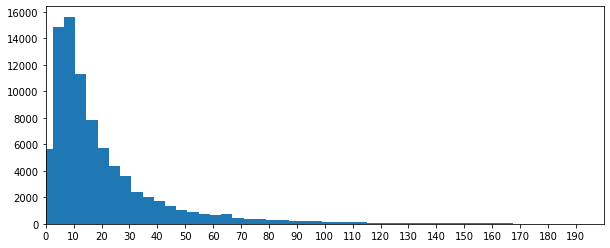

In [38]:
# Setting figure size
plt.figure(figsize=(10, 4))
# Plotting histogram
plt.hist(data=trip_time_under_200, x='trip_time', bins=50)
# Setting x axis limits
plt.xlim(0, 200)
# Setting xticks
plt.xticks(range(0, 200, 10));

In [39]:
# Checking rides with trip time under 1 minute
clean_trip_data.query('trip_time < 0')

,rideable_type,start_station_name,end_station_name,account_type,started_hour,ended_hour,monthday,weekday,trip_time
21575,docked_bike,7th Ave at Cabrillo St,Jones St at Post St,casual,19,19,18,Saturday,-0.200000
35958,docked_bike,Montgomery St BART Station (Market St at 2nd St),Powell St BART Station (Market St at 4th St),member,17,17,29,Wednesday,-0.183333
36591,docked_bike,Duboce Park,20th St at Bryant St,member,15,15,29,Wednesday,-0.333333
37164,docked_bike,Grand Ave at Perkins St,MacArthur Blvd at Telegraph Ave,casual,18,18,24,Friday,-0.133333
37540,docked_bike,Beale St at Harrison St,Buchanan St at North Point St,casual,11,11,25,Saturday,-0.133333
...,...,...,...,...,...,...,...,...,...
78738,docked_bike,Rhode Island St at 17th St,Garfield Square (25th St at Harrison St),member,15,15,29,Wednesday,-1.150000
78925,docked_bike,Parkmoor Ave at Race St,Parkmoor Ave at Race St,casual,11,11,25,Saturday,-0.083333
79596,docked_bike,Webster St at Grove St,Cyril Magnin St at Ellis St,casual,17,17,9,Thursday,-0.516667
79655,docked_bike,El Embarcadero at Grand Ave,Horton St at 40th St,member,12,12,5,Sunday,-0.550000


In [40]:
# Checking trip_time minimum value for rides with negativa trip_time values
clean_trip_data.query('trip_time < 0').trip_time.min()

-1.533333333333303

Observations:  
1. Right-skewed distribution.
2. 67 rows with incorrect information about the trip time (these trips have negative trip time values, and minimum value is -1.53).
3. 99% of the data falls between 0 and 129.35 .
4. There are some rides with more than one day of trip time, probably it's because the user forgot to return the bike, but I might search more about Bay Wheels to understand how is the process of using the bikes.

#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
It was possible to reach some conclusions about the number of rentals in each feature, such as the greater demand for electric bicycles, a list of stations with more or less occurrences of rentals (as well as returns), the bigger number of trips by casual users than members, the hours of the day with the highest number of rentals and the average duration of each trip.  
Some trips were also identified with travel time values that deserve further investigation, as they had negative or extremely high values, which caused them to be left out of the analysis.


#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
As mentioned above, the distribution of travel times had negative and extremely high values, which I decided to exclude from the analysis as they are probably user errors or data collection errors.
In addition, I expected a less uniform distribution of the weekdays, as I believed that some days would have significantly greater demands.
Below average rentals were also identified on April 4th, 5th and 6th, which I will probably investigate manually.


### Bivariate Exploration
In this section I'll be investigating relationships between pairs of variables in the data, aiming to discover patterns or correlations.

#### Rideable Type - Start Station Name

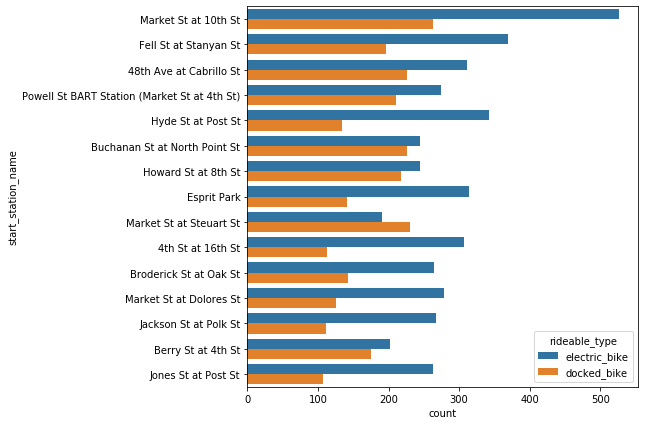

In [41]:
# Setting figure size
plt.figure(figsize=(7, 7))
# Creating countplot
sns.countplot(data=clean_trip_data, y='start_station_name', hue='rideable_type', order=popular_start_stations);

Observations:  
1. In general, the demand for electric bikes is greater than for docked bikes. However, the **Market St at Steuart St** station showed a higher demand for docked bikes.
2. Some stations have a similar demand for bicycles (Buchanan St at North Point St, Howard St at 8th St and Berry St at 4th St), while in others electric bikes have a huge advantage (e.g., Market St at 10th St, Hyde St at Post St, Esprit Park, 4th St at 16th St).

#### Rideable Type - Account Type

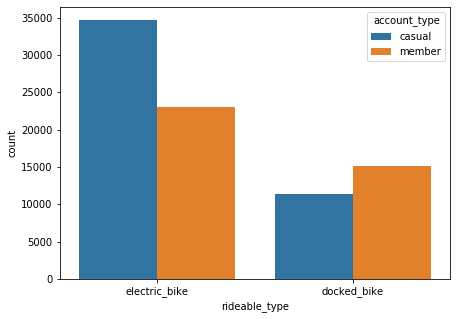

In [42]:
# Setting figure size
plt.figure(figsize=(7, 5))
# Creating countplot
sns.countplot(data=clean_trip_data, x='rideable_type', hue='account_type');

Observations:  
1. Electric bikes are mostly used by casual users, while docked bikes are mostly used by members.

#### Rideable Type - Started Hour

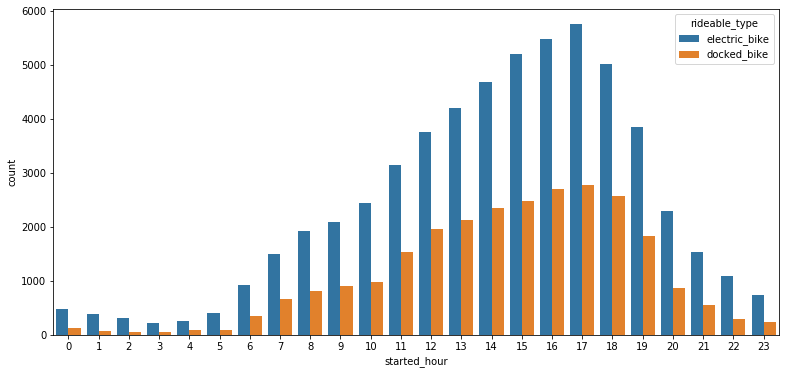

In [43]:
# Setting figure size
plt.figure(figsize=(13, 6))
# Creating countplot
sns.countplot(data=clean_trip_data, x='started_hour', hue='rideable_type');

Observations:  
1. The hour of the day doesn't seems to have any affect on whether a user will use a electric or a docked bike.

#### Rideable Type - Weekday

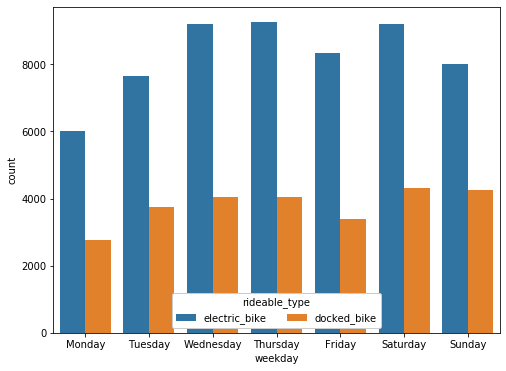

In [44]:
# Setting figure size
plt.figure(figsize=(8, 6))
# Creating countplot and defining a axes variable to change legend position later
ax = sns.countplot(data=clean_trip_data, x='weekday', hue='rideable_type', 
                   order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
# Changing legend position
ax.legend(loc=8, ncol=3, framealpha=1, title='rideable_type');

Observations:  
1. There's no significant correlation or pattern between rideable type and weekday.

#### Rideable Type - Trip Time

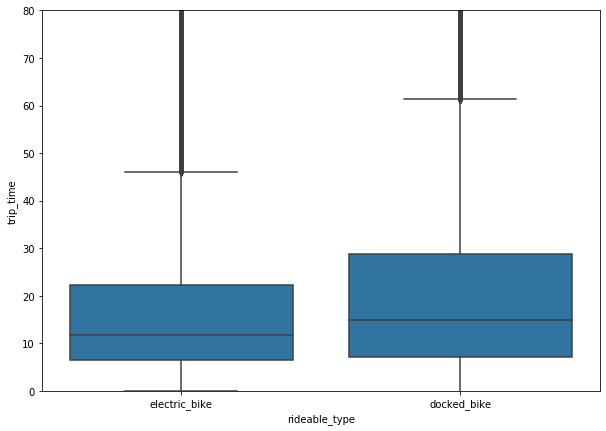

In [45]:
# Setting figure size
plt.figure(figsize=(10, 7))
# Plotting boxplot
sns.boxplot(data=clean_trip_data, x='rideable_type', y='trip_time', color=base_color)
# Setting y axis limits
plt.ylim(0, 80);

In [46]:
# Checking trip_time maximum value for rides with electric bikes
clean_trip_data.query('rideable_type == "electric_bike"').trip_time.max()

480.5

In [47]:
# Checking trip_time maximum value for rides with docked bikes
clean_trip_data.query('rideable_type == "docked_bike"').trip_time.max()

54728.86666666667

In [48]:
# Checking how many trips with docked bikes took more than the maximum value for trips with electric bikes
len(clean_trip_data.query('trip_time > 480 and rideable_type == "docked_bike"'))

202

In [49]:
# Checking trip_time outliers for rides with electric bikes
len(clean_trip_data.query('trip_time > 46 and rideable_type == "electric_bike"'))

5209

In [50]:
# Checking trip_time outliers for rides with electric bikes
len(clean_trip_data.query('trip_time > 61 and rideable_type == "docked_bike"'))

1859

Observations:  
1. Docked bikes trips usually takes longer than with electric bikes.
2. Electric bikes have more outliers than docked bikes, but their longest trip took about 8 hours, while docked bikes have exorbitant trip times (like 54728 minutes).

#### Started Station Name - Started Hour

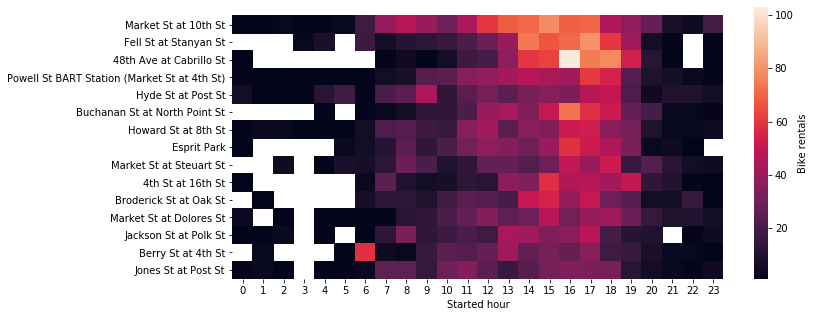

In [51]:
# Creating df with trips that start in one of the most popular start stations
top_stations_df = clean_trip_data[clean_trip_data.start_station_name.isin(popular_start_stations.values)]

# Setting figure size
plt.figure(figsize=(11, 5))

# Selecting number of trips grouped by started_hour and start_station_name
grouped_df = top_stations_df.groupby(['started_hour', 'start_station_name']).size().reset_index()
# Pivoting df so that every hour is a column and every station is a index
pivoted_grouped_df = grouped_df.pivot(index='start_station_name', columns='started_hour')
# Reindexing df and selecting only the most popular stations
popular_stations_count = pivoted_grouped_df.reindex(index=popular_start_stations)

# Plotting heatmap and defining axes variable
ax = sns.heatmap(popular_stations_count, cbar_kws={'label': 'Bike rentals'})
# Setting x axis label
plt.xlabel('Started hour')
# Dealing with a bug that cuts heatmap on top and bottom
ax.set_ylim(len(popular_start_stations.values), -0.5)
# Setting x ticks labels and defining their rotation
ax.set_xticklabels(range(0, 24), rotation=0);

Observations:  
1. Most station rentals occur during the afternoon, but some stations also have a significant number of rentals in the morning (e.g., Market St at 10th St, Hyde St at Post St, Howard St at 8th St, Jones St at Post St).
2. The most common rental time at Berry St at 4th St is at 6 am (high number of trips).
3. Market St at 10th St stands out as it has rentals throughout the entire day.
4. The number of rentals at Fell St at Stanyan St and 48th Ave at Cabrillo St is very high between 2pm and 7pm, but has very low demand at other times of the day.

#### Account Type - Started Hour

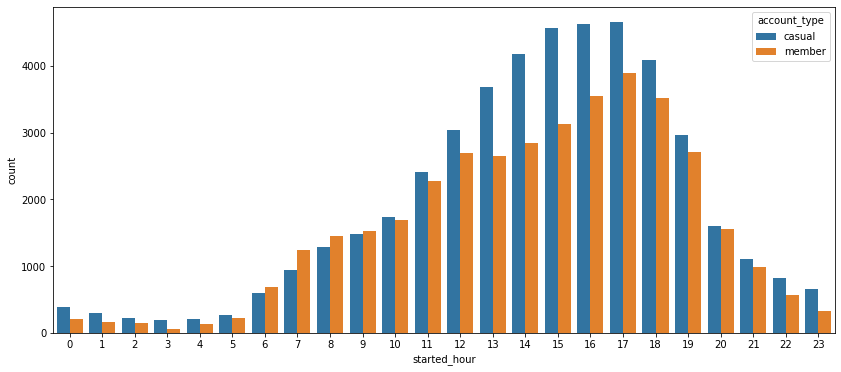

In [52]:
# Setting figure size
plt.figure(figsize=(14, 6))
# Creating countplot
sns.countplot(data=clean_trip_data, x='started_hour', hue='account_type');

Observations:  
1. The biggest difference between casual and member number of trips was in the afternoon, when there were more casual accounts renting bikes.
2. Between 6 am and 10 am there were more rentals by members, probably because these users often use the bikes to go to work/school/college or simply to practice outdoor activities.

#### Account Type - Weekday

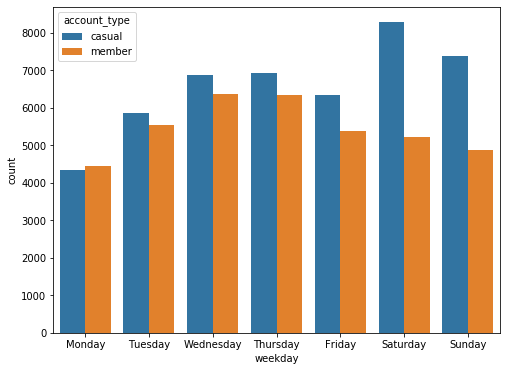

In [53]:
# Setting figure size
plt.figure(figsize=(8, 6))
# Creating countplot
sns.countplot(data=clean_trip_data, x='weekday', hue='account_type', 
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);

Observations:  
1. There's a notable difference in the weekends, when more casual users are renting bikes.
2. Besides the clearly higher number of rides by casual users on the weekends, the distributions are very similar.

#### Account Type - Trip Time

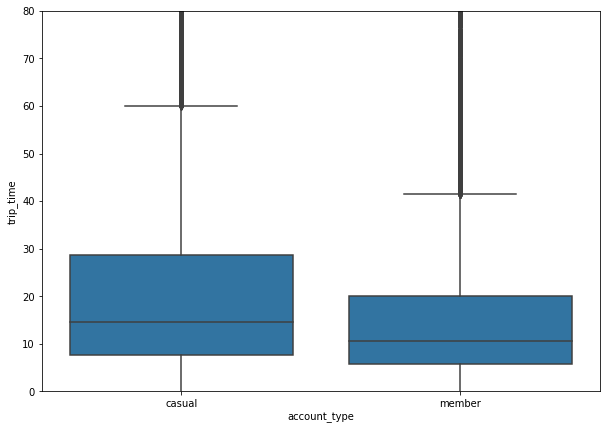

In [54]:
# Setting figure size
plt.figure(figsize=(10, 7))
# Plotting boxplot
sns.boxplot(data=clean_trip_data, x='account_type', y='trip_time', color=base_color)
# Setting y axis limits
plt.ylim(0, 80);

In [55]:
# Checking maximum trip_time value for rides made by casual users
clean_trip_data.query('account_type == "casual"').trip_time.max()

54728.86666666667

In [56]:
# Checking maximum trip_time value for rides made by members
clean_trip_data.query('account_type == "member"').trip_time.max()

24690.366666666665

In [57]:
# Checking number of trip_time outliers by casual users
len(clean_trip_data.query('trip_time > 60 and account_type == "casual"'))

4386

In [58]:
# Checking number of trip_time outliers by casual users
len(clean_trip_data.query('trip_time > 41 and account_type == "member"'))

2452

In [59]:
# Checking number of trip_time extreme outliers by casual users
len(clean_trip_data.query('trip_time > 600 and account_type == "casual"'))

170

In [60]:
# Checking number of trip_time extreme outliers by members
len(clean_trip_data.query('trip_time > 600 and account_type == "member"'))

18

Observations:  
1. Casual users rides usually take longer than member rides, though the difference isn't huge.
2. Casual users have more trip time outliers than members, and also have more extremely high values.

#### Started Hour - Weekday

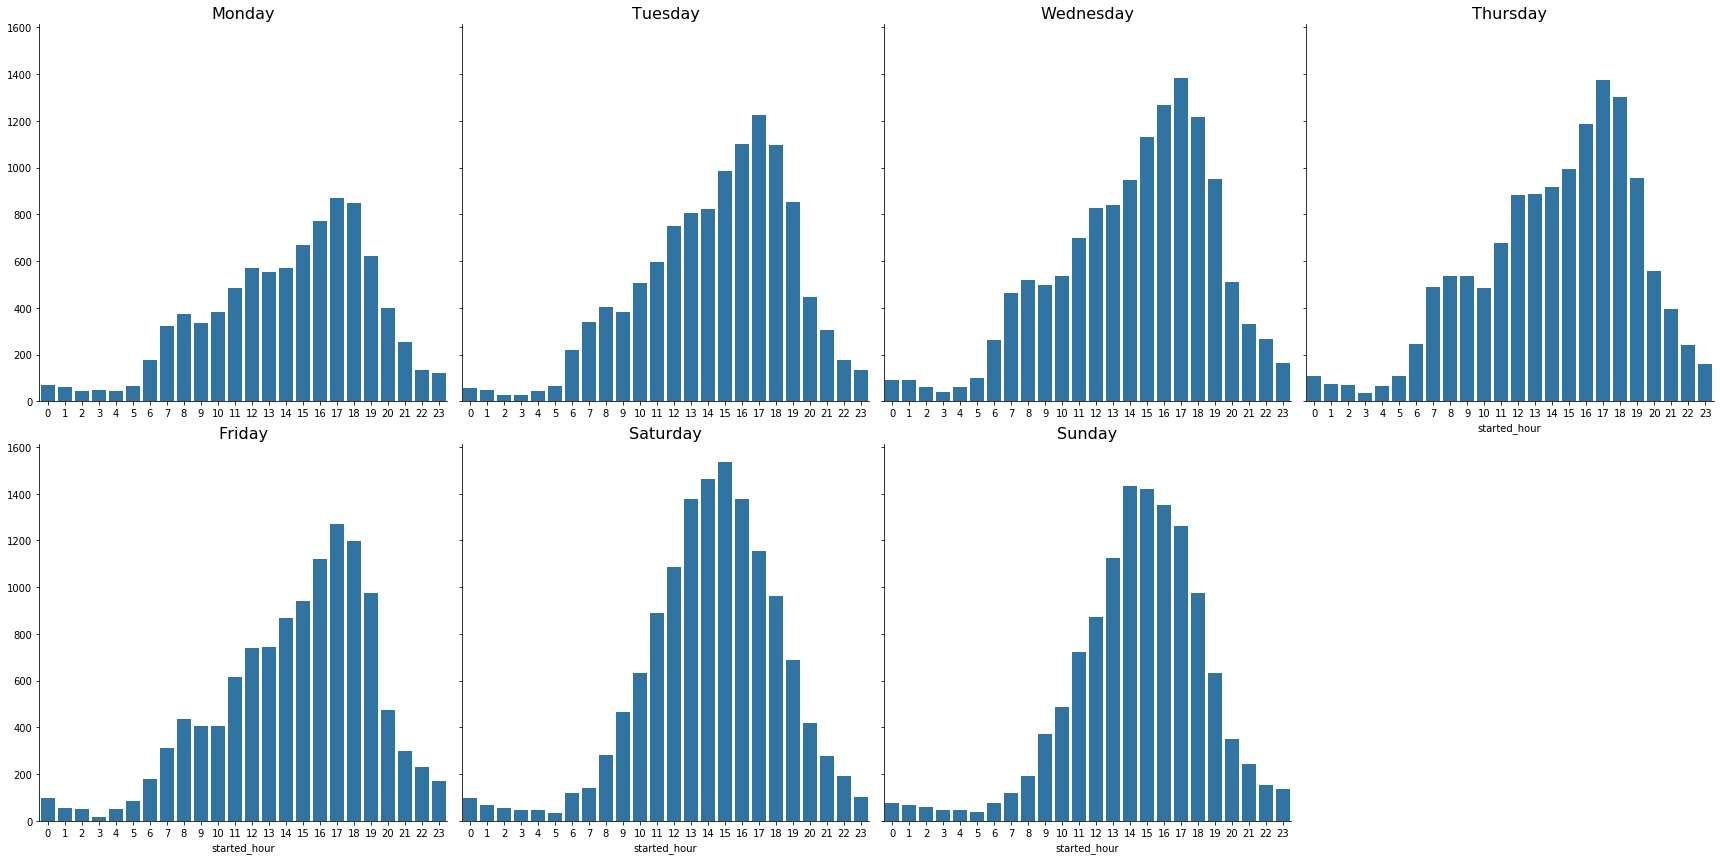

In [61]:
# Creating facetgrid with all days of the week
g = sns.FacetGrid(data=clean_trip_data, col='weekday', col_wrap=4, height=6, sharex=False,
                  col_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
# Displaying countplots in each space of the grid
g.map(sns.countplot, "started_hour", order=range(0, 24))
# Changing titles to be just the name of the weekday
g.set_titles('{col_name}', size=16);

Observations:  
1. Similar distributions, with weekend distributions being less left-skewed.
2. Mondays had less rentals.
3. Saturday and Sunday had less rentals before 10 am.

#### Started Hour - Ended Hour

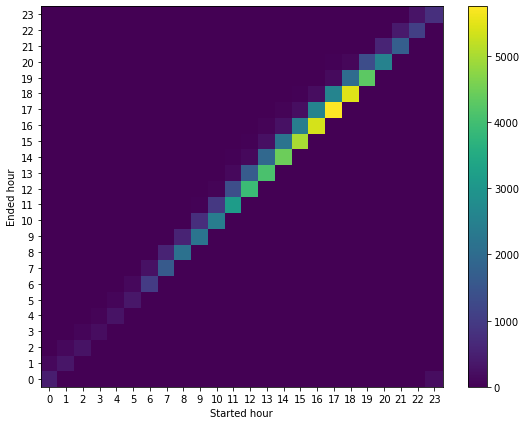

In [62]:
# Setting figure size
plt.figure(figsize=(9, 7))
# Setting desired bins of each axis
bins_x = np.arange(-0.5, 24.5, 1)
bins_y = np.arange(-0.5, 24.5, 1)
# Plotting heatmap
plt.hist2d(data=clean_trip_data, x='started_hour', y='ended_hour', bins=[bins_x, bins_y])
# Setting axes labels
plt.xlabel('Started hour')
plt.ylabel('Ended hour')
# Setting axes ticks
plt.xticks(range(0, 24))
plt.yticks(range(0, 24))
# Displaying color bar
plt.colorbar();

Observations:  
1. Trips take less than an hour in most cases, as seen before.

#### Started Hour - Trip Time

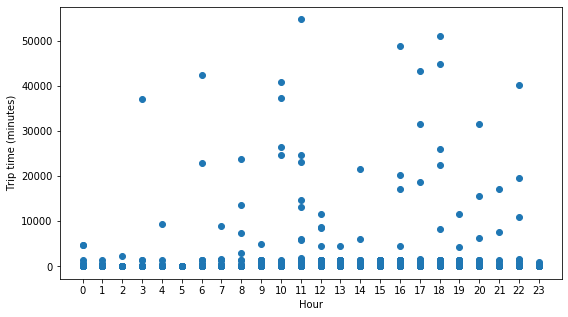

In [63]:
# Setting figure size
plt.figure(figsize=(9, 5))
# Creating scatterplot 
plt.scatter(data=clean_trip_data, x='started_hour', y='trip_time')
# Setting axes labels
plt.xlabel('Hour')
plt.ylabel('Trip time (minutes)')
# Setting x axis ticks
plt.xticks(range(0, 24));

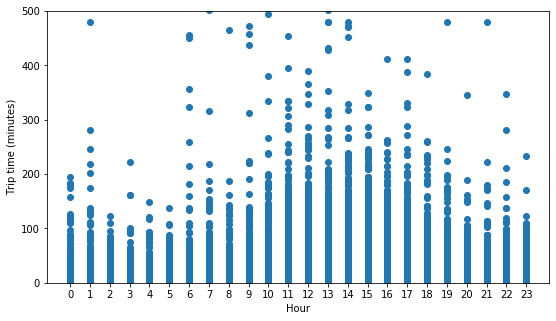

In [64]:
# Setting figure size
plt.figure(figsize=(9, 5))
# Creating scatterplot 
plt.scatter(data=clean_trip_data, x='started_hour', y='trip_time')
# Setting y axis limits
plt.ylim(0, 500)
# Setting axes labels
plt.xlabel('Hour')
plt.ylabel('Trip time (minutes)')
# Setting x axis ticks
plt.xticks(range(0, 24));

Observations:  
1. It seems that there were more longer trips between 10 am and 17 pm.
2. Multiple outliers, as seen before.

#### Weekday - Trip Time

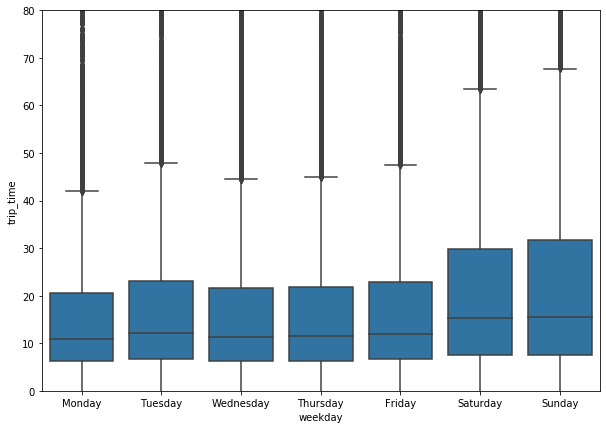

In [65]:
# Setting figure size
plt.figure(figsize=(10, 7))
# Plotting boxplots
sns.boxplot(data=clean_trip_data, x='weekday', y='trip_time', color=base_color, 
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
# Setting y axis limits
plt.ylim(0, 80);

Observations:  
1. There are usually more longer trips on the weekends (though the difference isn't huge).
2. There's no significant correlation between any workweek days.

#### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
It was possible to observe some interesting correlations regarding the number of rentals between pairs of variables, such as the majority of docked bike rentals being made by members, a notable increase in rentals by casual users on weekends, most rentals in the morning being made by members and a better understanding of the demand in each one of the most popular stations, which was possible due to the analysis of the distributions of rentals in those stations throughout the day.

#### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Regarding the trip time, it was possible to conclude that there were more long trips on weekends and that long trips (regardless of the day) occurred more between 10 am and 5 pm. Furthermore, trips by casual users generally take longer than trips by members, as well as trips with docked bikes usually take longer than trips with electric bikes (however, these are a few minutes differences, not representing strong correlations).



### Multivariate Exploration
In the Multivariate Exploration section I'll be creating plots of three or more variables to 
investigate the data even further.

#### Rideable Type - Start Station Name - Started Hour

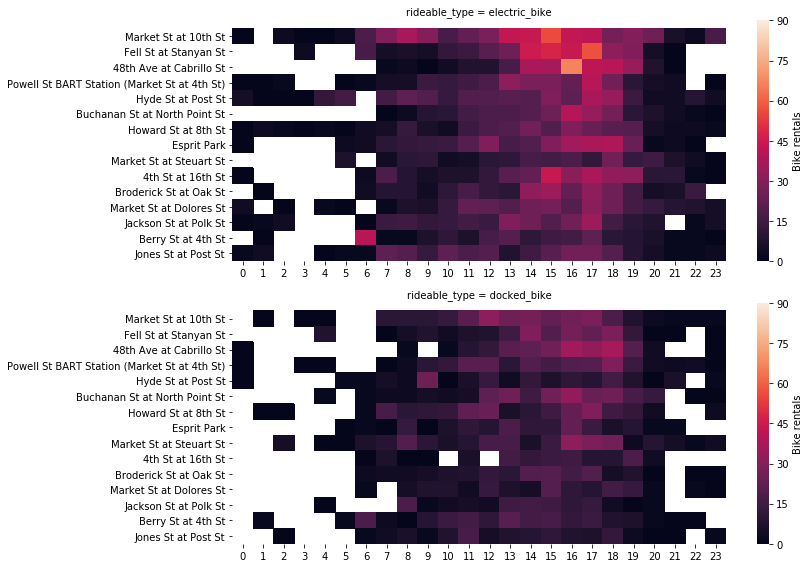

In [66]:
# Creating function what will be used when mapping the facetgrid to display the heatmaps
def draw_heatmap(*args, **kwargs):
    # Setting trip_data to be the data passed by the map_dataframe method
    trip_data = kwargs.pop('data')
    # Selecting the most popular stations
    top_stations_df = trip_data[trip_data.start_station_name.isin(popular_start_stations.values)]
    
    # Selecting number of trips grouped by started_hour and start_station_name
    grouped_df = top_stations_df.groupby(['started_hour', 'start_station_name']).size().reset_index()
    # Pivoting df so that every hour is a column and every station is a index
    pivoted_grouped_df = grouped_df.pivot(index='start_station_name', columns='started_hour')
    # Reindexing df and selecting only the most popular stations
    popular_stations_count = pivoted_grouped_df.reindex(index=popular_start_stations)
    
    # Drawing heatmap
    sns.heatmap(popular_stations_count, **kwargs)

# Creating facetgrid 
g = sns.FacetGrid(data=clean_trip_data, col='rideable_type', col_wrap=1,
                  sharex=False, height=4, aspect=3, margin_titles=True)
# Displaying heatmaps
g.map_dataframe(draw_heatmap, cbar_kws={'label': 'Bike rentals'}, vmin=0, vmax=90)
# Dealing with a bug that cuts heatmap on top and bottom and setting the x axis ticks
g.set(ylim=(len(popular_start_stations.values), -0.5), xticklabels=range(0, 24));

Observations:  
1. High number of electric bike rentals between 2 pm and 6 pm at stations Market St at 10th St, Fell St at Stanyan St and 48th Ave at Cabrillo St (there are some relevant differences when compared to docked bikes).
2. The majority of rentals at 6 am at Berry St at 4th St station were electric bikes (with a big difference in comparison to docked bikes).
3. There were few docked bike rentals at Hyde St at Post St station (when compared to electric bikes).

#### Rideable Type - Account Type - Weekday

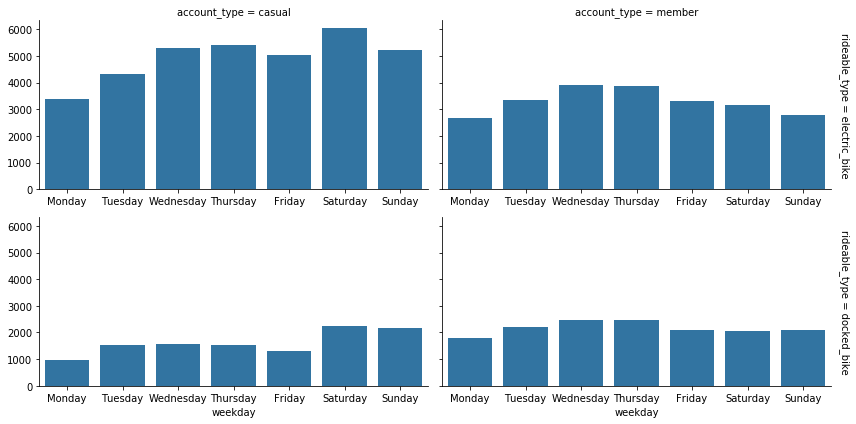

In [67]:
# Creating facetgrid
g = sns.FacetGrid(data=clean_trip_data, col='account_type', row='rideable_type', 
                  height=3, aspect=2, margin_titles=True, sharex=False)
# Displaying countplots
g.map(sns.countplot, 'weekday', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);

Observations:  
1. It doesn't seems to have any correlation or pattern between the account type, rideable type and weekday that hasn't been observed before.

#### Rideable Type - Account Type - Trip Time

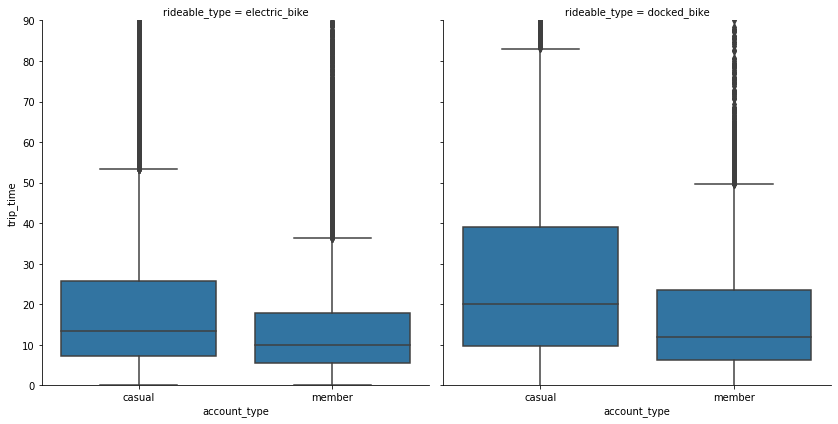

In [68]:
# Creating facetgrid
g = sns.FacetGrid(data=clean_trip_data, col='rideable_type', 
                  height=6, margin_titles=True)
# Displaying boxplots
g.map(sns.boxplot, 'account_type', 'trip_time', order=['casual', 'member'])
# Setting y axis limits
g.set(ylim=(0, 90));

Observations:  
1. Member rides duration is generally shorter, especially with docked bikes.
2. The docked bikes trip time interquartile range is bigger than for electric bikes, regardless of the account type (indicating a greater variation).

#### Rideable Type - Weekday - Trip Time

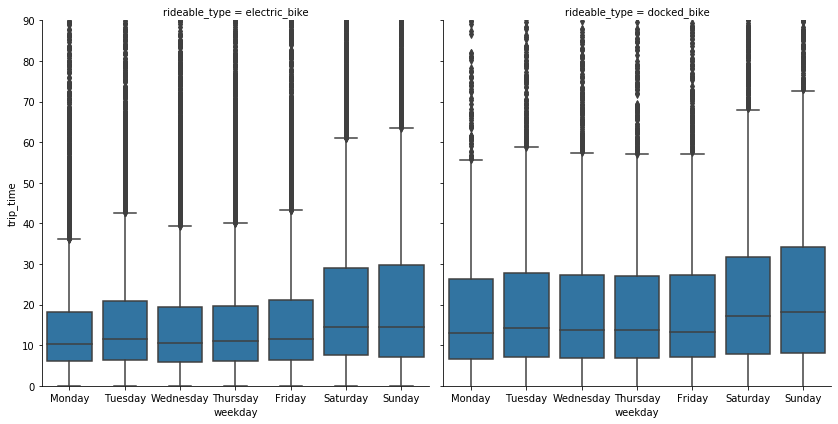

In [69]:
# Creating facetgrid
g = sns.FacetGrid(data=clean_trip_data, col='rideable_type', 
                  height=6, margin_titles=True)
# Displaying boxplots
g.map(sns.boxplot, 'weekday', 'trip_time', 
      order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
# Setting y axis limits
g.set(ylim=(0, 90));

Observations:  
1. There's a noteworthy increase in the size of the trip time interquartile range at the weekends with electric bikes, when compared to workdays (though the increase is also true for docked bikes, the difference isn't so relevant). 
2. The docked bikes trip time interquartile range is bigger than for electric bikes, regardless the day of the week.

#### Start Station Name - Account Type - Started Hour

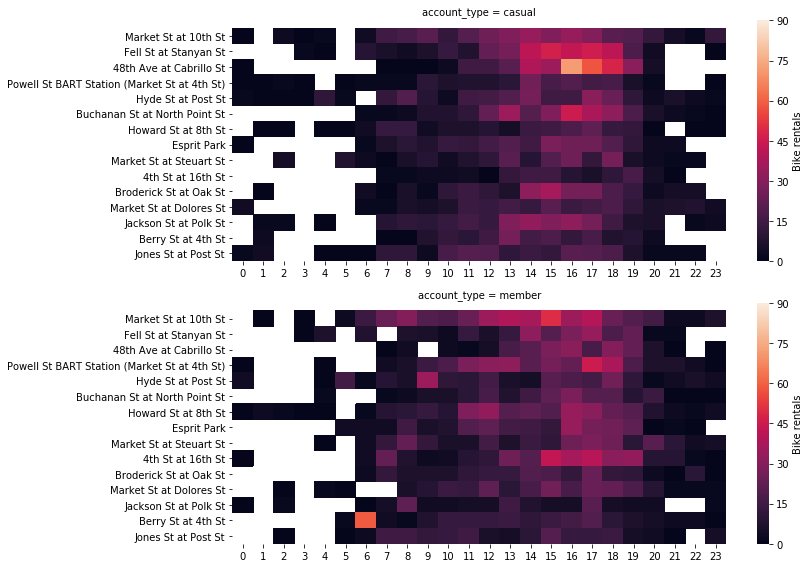

In [70]:
# Creating facetgrid
g = sns.FacetGrid(data=clean_trip_data, col='account_type', col_wrap=1,
                  sharex=False, height=4, aspect=3, margin_titles=True)
# Displaying heatmaps using the "draw_heatmap" function created when displaying the previous heatmaps
g.map_dataframe(draw_heatmap, cbar_kws={'label': 'Bike rentals'}, vmin=0, vmax=90)
# Dealing with a bug that cuts heatmap on top and bottom and setting the x axis ticks
g.set(ylim=(len(popular_start_stations.values), -0.5), xticklabels=range(0, 24));

Observations:  
1. High number of casual rides at Fell St at Stanyan St and 48th Ave at Cabrillo St between 2 pm and 6 pm.
2. Low number of casual rides at 4th St at 16th St when compared to members, especially between 3pm and 7 pm.
3. Most of the trips at 6 am in the Berry St at 4th St station were made by members, with a huge difference when compared to casual users.

#### Account Type - Weekday - Trip Time

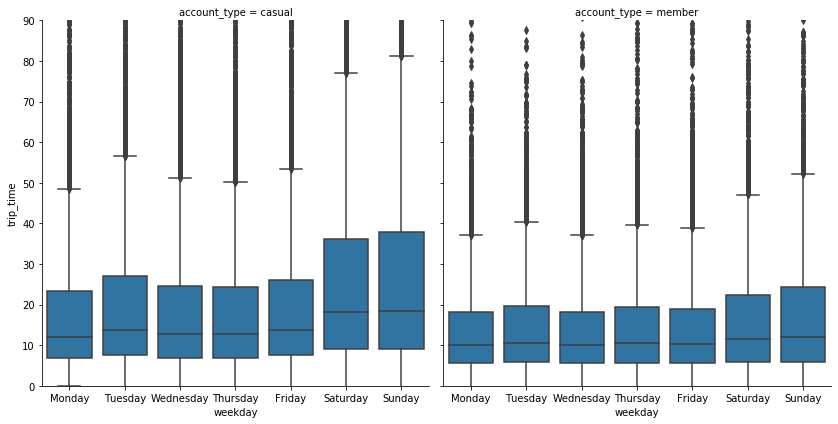

In [71]:
# Creating facetgrid
g = sns.FacetGrid(data=clean_trip_data, col='account_type', 
                  height=6, margin_titles=True)
# Displaying boxplots
g.map(sns.boxplot, 'weekday', 'trip_time', 
      order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
# Setting y axis limits
g.set(ylim=(0, 90));

Observations:  
1. Casual users trip time interquartile range is bigger than members interquartile range in every day of the week, but especially on weekends.
2. There is no any significant increase or decrease in members trip time at any day of the week, although there's a slightly increase on the weekends.

#### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
Through multivariate exploration it was possible to detect that most of the rentals made at 6 am at the Berry St at 4th St station were for electric bikes by members. It was also clear that the high demand at Market St at 10th St, Fell St at Stanyan St and 48th Avenue at Cabrillo St stations is mostly for electric bikes by both types of users, with casual users trips being more frequent.  
When analyzing the duration of the trips, the correlations and trends followed what was observed in previous explorations, with the exception of a strengthening in the trip time variation of casual users when using docked bikes, which will probably dificult any prediction about a trip duration.

#### Were there any interesting or surprising interactions between features?
I was a little surprised at the consistency of the trip time by members throughout the week, as I expected greater increases on weekends.  
The difference of one or two minutes in the median is practically irrelevant, which helps to explain why the correlation between days of the week and trip time appears to be so small.